In [1]:
import streamlit as st
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

ModuleNotFoundError: No module named 'streamlit'

In [21]:
df = pd.read_excel("../data/raw/car_data.xlsx")

In [4]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [12]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [1]:
sns.jointplot(x='cylinders', y='combination_mpg', data= df, alpha=0.5)

NameError: name 'sns' is not defined

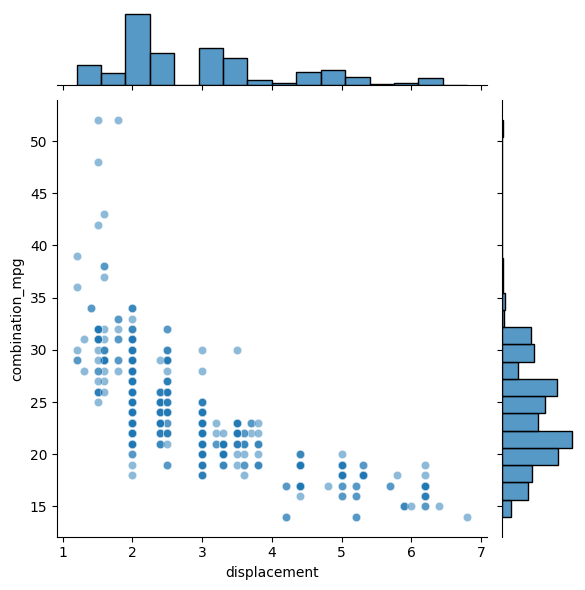

In [ ]:
sns.jointplot(x='displacement', y='combination_mpg', data= df, alpha=0.5)

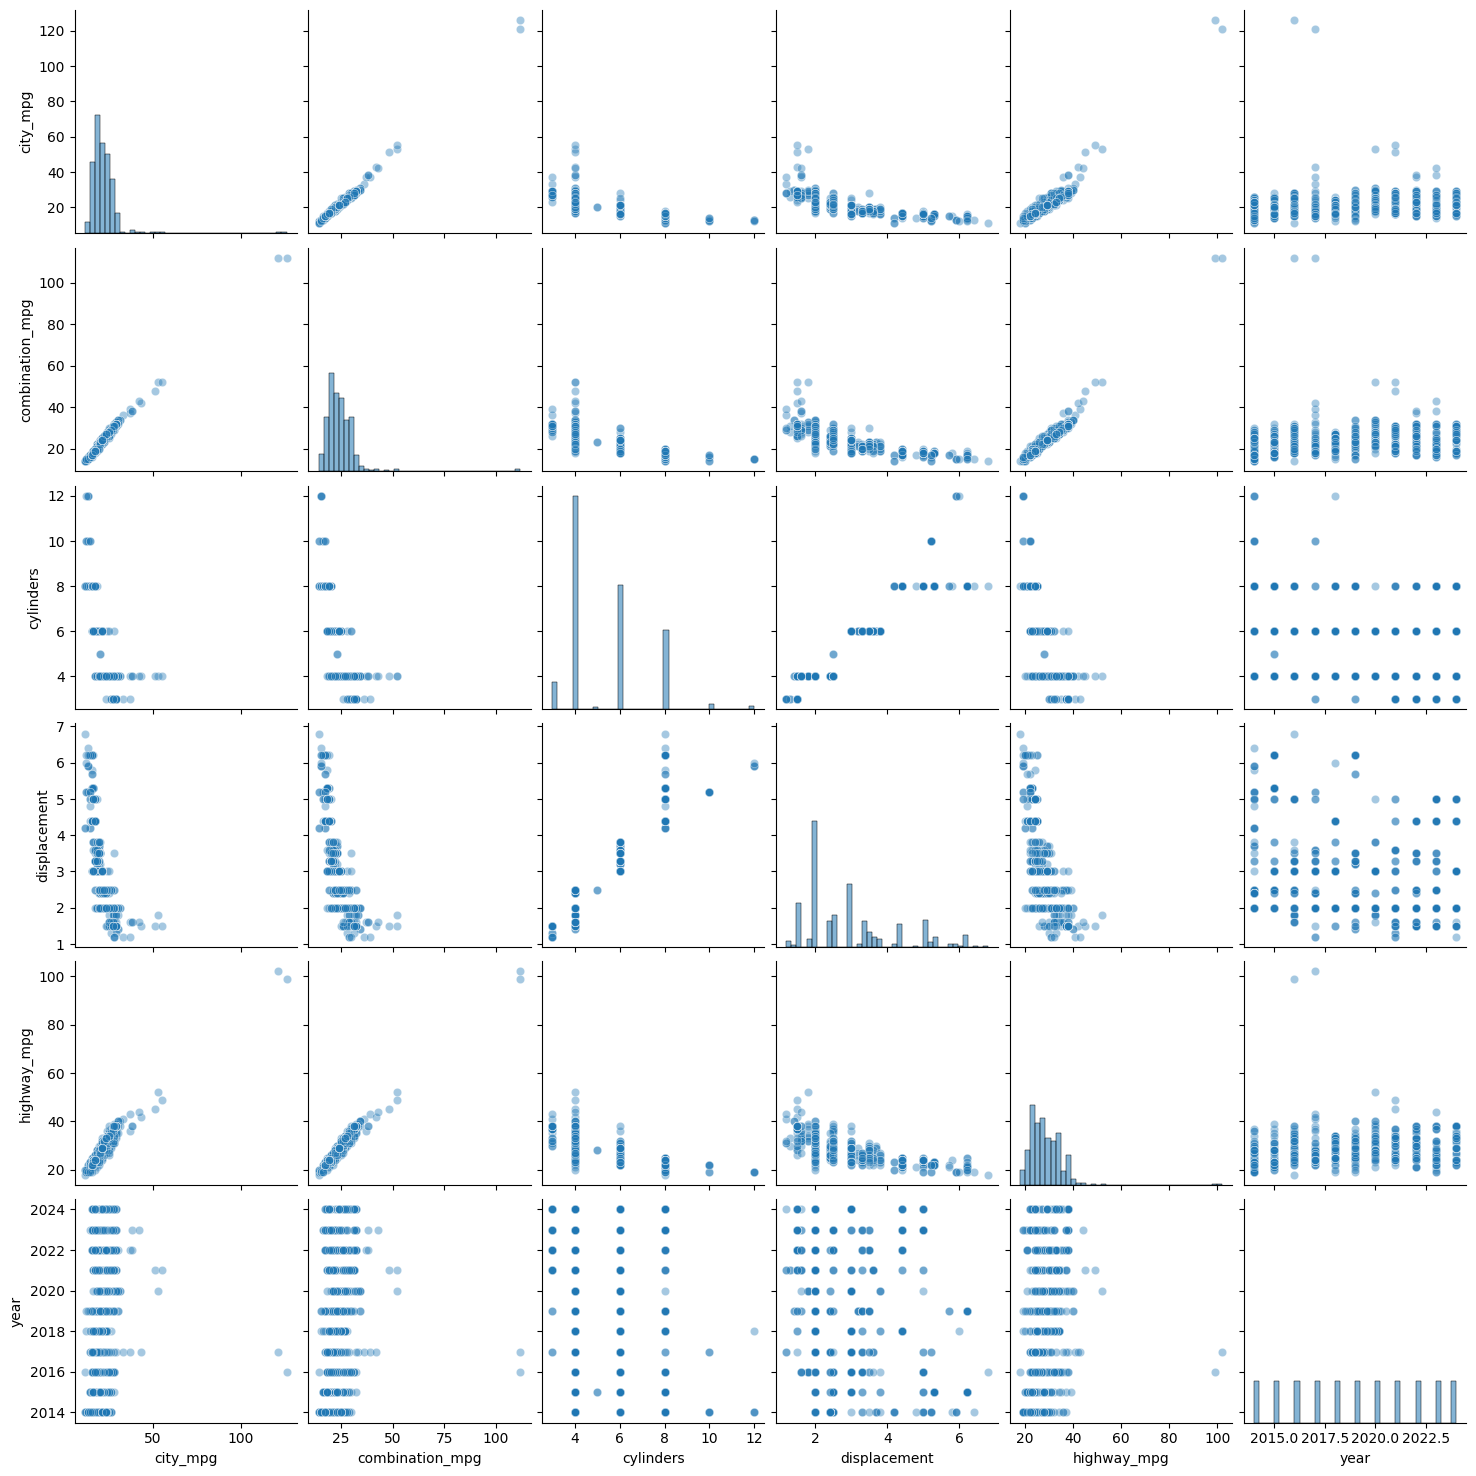

In [16]:
sns.pairplot(df, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

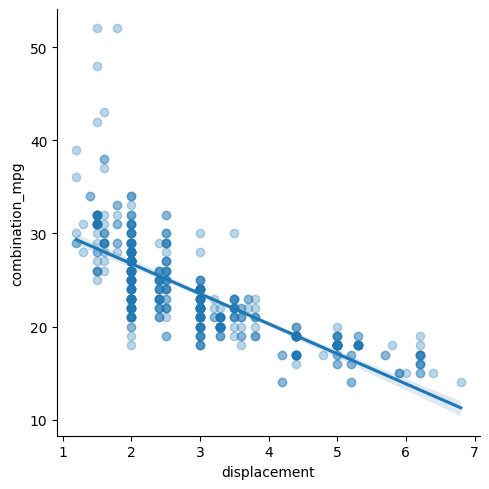

In [15]:
# length of membership vs yearly amount spent
sns.lmplot(x='displacement', 
           y='combination_mpg', 
           data=df,
           scatter_kws={'alpha':0.3})


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [14]:
df_encoded = pd.get_dummies(df, columns=['class', 'drive', 'fuel_type', 'make', 'model', 'transmission'], drop_first=True)

In [32]:
X = df_encoded.drop(['combination_mpg', 'city_mpg', 'highway_mpg'], axis=1)
y = df['combination_mpg']

In [33]:
X = X.apply(pd.to_numeric, errors='coerce')

In [34]:
X = X.dropna()
y = y[X.index]

In [35]:
X = sm.add_constant(X)

In [36]:
X.head()
y.head()

0    29
1    30
2    27
3    29
4    28
Name: combination_mpg, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


NameError: name 'train_test_split' is not defined

In [12]:
from sklearn.linear_model import LinearRegression


In [11]:
lm = LinearRegression()


NameError: name 'LinearRegression' is not defined

In [10]:
lm.fit(X_train, y_train)

NameError: name 'lm' is not defined

In [9]:
# the coefficients
lm.coef_

NameError: name 'lm' is not defined

In [6]:

# r squared
lm.score(X, y)


NameError: name 'lm' is not defined

In [20]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

NameError: name 'lm' is not defined

In [25]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'combination_mpg vs. Model Predictions')

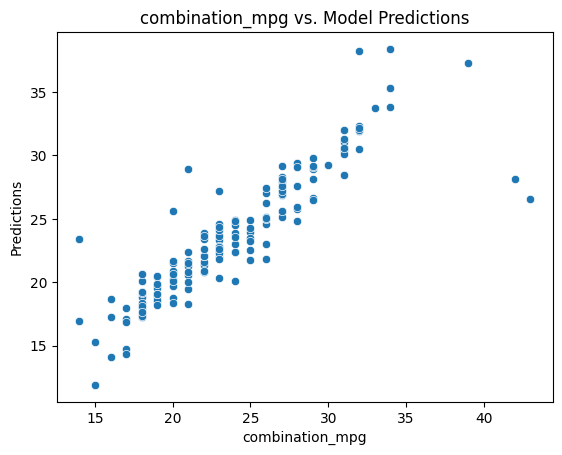

In [26]:

sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('combination_mpg vs. Model Predictions')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [3]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

NameError: name 'y_test' is not defined

/var/folders/hd/34n8dc152qdds237yc23_fy00000gn/T/ipykernel_42731/339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='combination_mpg', ylabel='Density'>

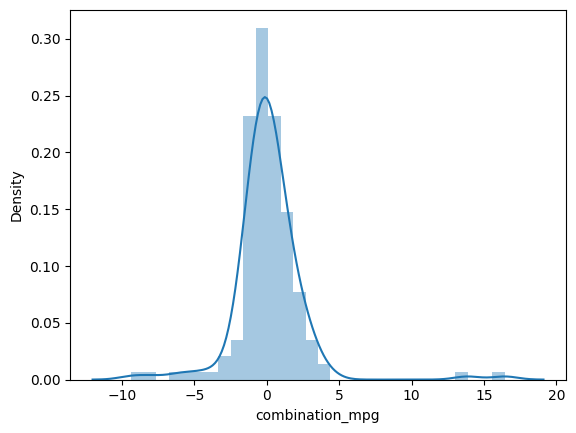

In [29]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

In [19]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

NameError: name 'residuals' is not defined